In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Contours Feature

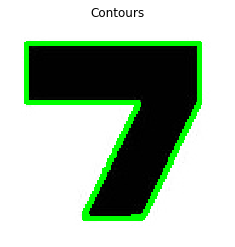

In [24]:
img = cv2.imread('cropped.jpg')
img_copy = img.copy()
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
res, thr = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(thr, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[1]

cv2.drawContours(img_copy, [cnt], -1, (0, 255, 0), 2)
plt.imshow(img_copy)
plt.title('Contours')
plt.axis('off')
plt.show()

## 1. Aspect Ratio
    Aspect Ratio는 이미지의 가로 세로 비율이다. 주어진 Contour의 외접하는 직사각형을 boundingRect 함수를 이용해 구한 뒤 이 직사각형의 높이와 너비를 이용하여 Aspect Ratio 값을 구한다.

In [25]:
x, y, w, h = cv2.boundingRect(cnt)
aspect_ratio = float(w) / h
print(aspect_ratio)

0.9903846153846154


---
## 2. Extent
    Extent는 Contours에 외접하는 직사각형의 넓이와 Contours Area 넓이의 비로 구할 수 있다.

0.5579256908140403


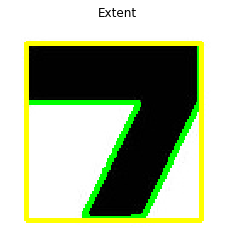

In [26]:
img1 = img_copy.copy()
area = cv2.contourArea(cnt)
x, y, w, h = cv2.boundingRect(cnt)
rect_area = w * h
extend = float(area) / rect_area
print(extend)

cv2.rectangle(img1, (x, y), (x+w, y+h), (255, 255, 0), 2)
plt.imshow(img1)
plt.title('Extent')
plt.axis('off')
plt.show()

---
## 3. Solidity
    Solidity는 Contours의 넓이와 Contours의 Convex Hull 넓이의 비로 구할 수 있다.

0.7304895190368514


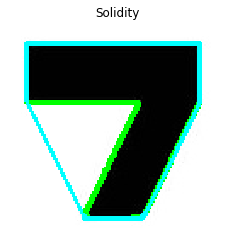

In [27]:
img2 = img_copy.copy()
area = cv2.contourArea(cnt)
hull = cv2.convexHull(cnt)
hull_area = cv2.contourArea(hull)
solidity = float(area)/hull_area
print(solidity)

cv2.drawContours(img2, [hull], -1, (0, 255, 255), 2)
plt.imshow(img2)
plt.title('Solidity')
plt.axis('off')
plt.show()

---
## 4. Equivalent Diameter
    Equivalent Diameter는 Contour의 넓이와 동일한 넓이를 가진 원의 지름을 구하는 방법이다. 다음과 같은 방법으로 구할 수 있다. √((4 * Contour Area) / π )

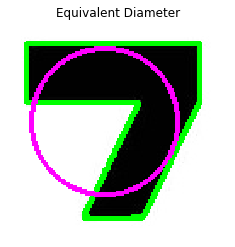

In [28]:
img3 = img_copy.copy()
area = cv2.contourArea(cnt)
equivalent_diameter = np.sqrt(4 * area / np.pi)

cv2.circle(img3, (int((x+w)/2), int((y+h)/2)), int(equivalent_diameter/2), (255, 0, 255), 2)
plt.imshow(img3)
plt.title('Equivalent Diameter')
plt.axis('off')
plt.show()

---
## 5. Orientation
    Orientation은 객체가 향하고 있는 방향을 말한다. 다음과 같은 방법으로 Contour를 둘러싸는 타원의 장축과 단축의 길이, 기울어진 각도를 구할 수 있다. 이렇게 타원이 최적으로 기울어진 각도로 구한다.

In [29]:
(x, y), (MajorAxis, MinorAxis), angle = cv2.fitEllipse(cnt)
print(angle)

5.350176811218262


---
## 6. Mask & Pixel Point
    물체를 구성하는 모든 점들을 필요로 할 때가 있다. 이 점들의 픽셀값을 구할 때 2가지 방법을 사용할 수 있다. 하나는 Numpy 함수를 이용하는 것이고 다른 하나는 OpenCV의 함수를 이용하는 것이다. 두가지 방법 모두 같은 결과를 반환하지만 살짝 다르다. Numpy 함수는 (행, 열) 형식의 좌표값을 반환하는 반면 OpenCV 함수는 이미지 상에서 (열, 행) = (x, y) 형식의 좌표값을 반환한다. 그래서 기본적으로 답은 상호교환이 된다. (row = x, column = y)

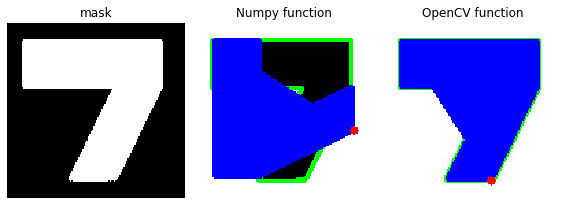

In [30]:
img5 = img_copy.copy()
img6 = img_copy.copy()

# print(img_gray.shape) : (128, 130)
# print(img.shape) : (128, 130, 3)
mask = np.zeros(img_gray.shape, np.uint8)
cv2.drawContours(mask, [cnt], -1, 255, -1)

pixel_np = np.transpose(np.nonzero(mask))
pixel_opencv = cv2.findNonZero(mask)

cv2.drawContours(img5, [pixel_np], 0, (0, 0, 255), -1)
cv2.circle(img5, (115, 78), 3, (255, 0, 0), -1)
cv2.drawContours(img6, [pixel_opencv], 0, (0, 0, 255), -1)
cv2.circle(img6, (78, 115), 3, (255, 0, 0), -1)

images = [mask, img5, img6]
titles = ["mask", "Numpy function", "OpenCV function"]

cv2.imshow('numpy', img5)
cv2.imshow('opencv', img6)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.figure(figsize=(8 ,8))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.title(titles[i])
    plt.imshow(images[i], cmap = "gray")
    plt.axis('off')

plt.tight_layout()
plt.show()

    numpy 배열을 만드는 함수 중에서 모든 요소들을 0으로 채워주는 zeros 함수를 이용해 해당이미지의 크기만큼 배열을 만들어준다. 이때 중요한 것은 만들어진 배열의 채널이 3개를 가져서는 안된다. (img.shape[:2]로 하면 원본 이미지의 폭과 높이만 가져올 수 있다.) 그렇게 만들어진 검정색 캔버스에 contours[1]로 연결한 등고선을 따라 흰색으로 그려준다.
    
    그 후 nonzero 함수를 이용해 mask 캔버스에 0(검정색)이 아닌 부분의 행과 열의 index를 가져온다. 이때 mask는 2차원 행렬이므로 nonzero 함수로 index를 가져올 때 행과 열, 두 가지 값만을 가져올 수 있다. 따라서 이 행렬을 transpose하면 2차원 포인터로 이루어진 벡터를 얻을 수 있으며, 이 2차원 포인터 배열을 통해 drawContours 함수로 객체를 구성하는 점들을 얻을 수 있다. nonzero 등의 numpy 함수는 numpy array를 행과 열, 순서로 각각의 index를 가져오기 때문에 이 행렬을 transpose 할 경우 좌상단과 우하단을 직선으로 이은 선을 기준으로 대칭한 결과가 나타난다.
    
    하지만 openCV 함수의 findNonZero 함수를 사용하면 이렇게 행렬을 전치하였을 때 생기는 문제점을 방지할 수 있다.
## cv2.findNonZero(src [, idx]) → idx
    이 함수는 single-channel 배열을 입력으로 받아 zero가 아닌 픽셀들의 위치를 리스트화하여 반환하는 함수이다. threshold(), compare() 함수 등을 이용한 연산으로 만들어지는 바이너리 매트릭스가 주어지면, cv2.Mat 혹은 포인터들의 벡터 형태로 모든 0이 아닌 index를 반환한다.

---
## 7. Maximum, Minimum Value and their location
    mask 이미지를 사용해 이미지 객체 내에서 최댓값과 최솟값, 그리고 그 값을 갖는 픽셀의 위치를 찾을 수 있다.
    
## cv2.minMaxLoc(src [, mask]) → minVal, maxVal, minLoc, maxLoc
    위 함수는 배열에서 최댓값과 최솟값, 그리고 해당 값을 갖는 위치를 반환하는 함수이다. 만약 mask가 비어있는 경우 최댓값과 최솟값은 src 원본 이미지에서 찾고, mask가 비어있지 않은 경우에는 src 원본 이미지에서 mask로 지정된 부분의 영역에서만 찾게 된다.
    
    1. src : single-channel 배열
    2. mask : 하위 배열을 선택하는데 사용되는 선택적 mask

In [31]:
mask = np.zeros(img_gray.shape, np.uint8)
cv2.drawContours(mask, [cnt], -1, 255, -1)

min_val1, max_val1, min_loc1, max_loc1 = cv2.minMaxLoc(img_gray, mask=mask)
min_val2, max_val2, min_loc2, max_loc2 = cv2.minMaxLoc(img_gray)

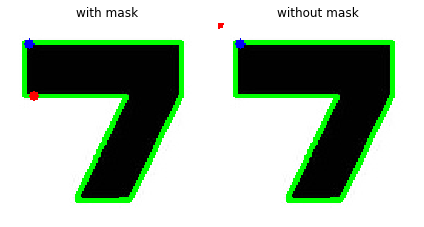

In [32]:
img7 = img_copy.copy()
img8 = img_copy.copy()
cv2.circle(img7, min_loc1, 3, (0, 0, 255), -1)
cv2.circle(img7, max_loc1, 3, (255, 0, 0), -1)
cv2.circle(img8, min_loc2, 3, (0, 0, 255), -1)
cv2.circle(img8, max_loc2, 3, (255, 0, 0), -1)

images = [img7, img8]
titles = ["with mask", "without mask"]

plt.figure(figsize=(6, 6))
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

---
## 8. Mean Color / Intensity
    앞서 배열의 최댓값을 갖는 픽셀과 최솟값을 갖는 픽셀을 찾을 수 있었다면 이번에는 객체의 색의 평균값을 찾을 수 있다. 혹은 gray-scale 이미지에서는 물체의 평균 강도를 찾을 수 있다.
    
## cv2.mean(src [, mask]) → retval
    해당 함수는 배열 요소들의 평균값을 계산하는 함수이다. 각각의 채널을 독립적으로 배열의 요소들의 평균값을 계산하여 그 값을 반환한다. 채널이 1개인 배열부터 4개인 배열까지 입력받을 수 있어, 요소가 4개인 스칼라 형태로 반환받으며, 해당 채널이 존재하지 않는 경우 0으로 계산된다.
    
    1. src : 결과가 Scalar 형태로 저장되도록 채널이 1개부터 4개인 배열만 입력할 수 있다.
    2. mask : 하위 배열을 선택하는데 사용되는 선택적 mask

In [33]:
mean_val1 = cv2.mean(img, mask = mask)
mean_val2 = cv2.mean(img)
mean_val3 = cv2.mean(img_gray, mask = mask)
mean_val4 = cv2.mean(thr, mask = mask)

print(mean_val1)
print(mean_val2)
print(mean_val3)
print(mean_val4)

(17.509143874413336, 17.509143874413336, 17.509143874413336, 0.0)
(166.59218750000002, 166.59218750000002, 166.59218750000002, 0.0)
(17.509143874413336, 0.0, 0.0, 0.0)
(16.63133193073313, 0.0, 0.0, 0.0)


---
## 9. Extreme Points
    사실 이 요소는 앞서 Contours Feature 1에서 다룬적이 있다. 말그대로 동서남북의 극점을 찾는 방법으로 다음과 같은 방법을 사용해서 좌우상하의 끝점을 찾을 수 있다.

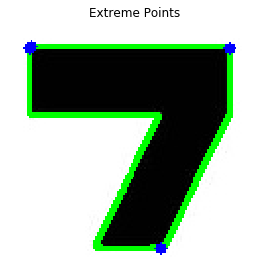

In [44]:
img9 = img_copy.copy()
leftmost = tuple(cnt[cnt[:,:,0].argmin()][0])
rightmost = tuple(cnt[cnt[:,:,0].argmax()][0])
topmost = tuple(cnt[cnt[:,:,1].argmin()][0])
bottommost = tuple(cnt[cnt[:,:,1].argmax()][0])

cv2.circle(img9, leftmost, 3, (0, 0, 255), -1)
cv2.circle(img9, rightmost, 3, (0, 0, 255), -1)
cv2.circle(img9, bottommost, 3, (0, 0, 255), -1)
cv2.circle(img9, topmost, 3, (0, 0, 255), -1)

plt.imshow(img9, cmap = "gray")
plt.title("Extreme Points")
plt.axis("off")
plt.tight_layout()

    cnt는 Contours Point가 포함된 array이다. 여기서 cnt[:, :, 0]이 의미하는 바는 point의 x좌표 값만 포함하는 배열이 된다. 여기에 argmin함수를 적용하면 x좌표 중에서 가장 작은 x좌표의 index를 받게 되고, 해당 index를 다시 cnt에서 찾으면 가장 왼쪽에 있는 좌표를 얻을 수 있다. 동일한 방법으로 상하좌우의 극점을 모두 찾을 수 있다.

---
# Summary
1. Aspect Ration
2. Extent
3. Solidity
4. Equivalent Diameter
5. Orientation
6. Mask & Pixel Point
7. Max and Min Value and Location
8. Mean Color / Intensity
9. Extreme Point

aspect ratio : 1.1395348837209303
extent : 0.21618414807783579
solidity : 0.3794252394835485
equivalent diameter : 24.082371407875648
orientation(angle): 120.13188934326172
Minimum Value : 128.0
Minimum Value : (52, 57)
Maximum Value : 255.0
Maximum Value : (18, 16)
Mean Intensity : (240.20138888888889, 240.20138888888889, 240.20138888888889, 0.0)
leftmost : (13, 41)
rightmost : (61, 54)
topmost : (19, 15)
bottommost : (51, 57)


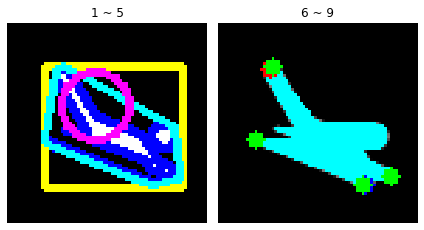

In [123]:
img = cv2.imread("national_park_service_pictogramsss.png")
img_copy = img.copy()
img_copy2 = img.copy()
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
res, thr = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(thr, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

cnt = contours[0]
cv2.drawContours(img_copy, [cnt], -1, (0, 0, 255), 2)

## 1. aspect ratio
x, y, w, h = cv2.boundingRect(cnt)
aspect_ratio = float(w) / h
print("aspect ratio :", aspect_ratio)

## 2. extent
area = cv2.contourArea(cnt)
rect_area = w * h
extent = float(area)/rect_area
print("extent :", extent)
cv2.rectangle(img_copy, (x, y), (x+w, y+h), (255, 255, 0), 2)

## 3. solidity
hull = cv2.convexHull(cnt)
hull_area = cv2.contourArea(hull)
solidity = float(area)/hull_area
print("solidity :", solidity)
cv2.drawContours(img_copy, [hull], -1, (0, 255, 255), 2)

# 4. equivalent diameter
equivalent_diameter = np.sqrt(4 * area/np.pi)
cv2.circle(img_copy, (int((x+w)/2), int((y+h)/2)), int(equivalent_diameter/2), (255, 0, 255), 2)
print("equivalent diameter :", equivalent_diameter)

# 5. orientation
(x, y), (MajorAxis, MinorAxis), angle = cv2.fitEllipse(cnt)
print("orientation(angle):", angle)

# 6. mask & pixel point
mask= np.zeros(img.shape[:2], np.uint8)
cv2.drawContours(mask, [cnt], -1, 255, -1)
# pixel_np = np.transpose(np.nonzero(mask))
pixel_opencv = cv2.findNonZero(mask)
# cv2.drawContours(img_copy2, [pixel_np], -1, (255, 255, 0), -1)
cv2.drawContours(img_copy2, [pixel_opencv], -1, (0, 255, 255), -1)

# 7. Maximum and Minimum Value and their Location
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(img_gray, mask = mask)
print("Minimum Value :", min_val)
print("Minimum Value :", min_loc)
print("Maximum Value :", max_val)
print("Maximum Value :", max_loc)
cv2.circle(img_copy2, min_loc, 3, (0, 0, 255), -1)
cv2.circle(img_copy2, max_loc, 3, (255, 0, 0), -1)

# 8. Mean Color / Intensity
mean_val = cv2.mean(img, mask=mask)
print("Mean Intensity :", mean_val)

# 9. Extream Point
leftmost = tuple(cnt[cnt[:, :, 0].argmin()][0])
rightmost = tuple(cnt[cnt[:, :, 0].argmax()][0])
topmost = tuple(cnt[cnt[:, :, 1].argmin()][0])
bottommost = tuple(cnt[cnt[:, :, 1].argmax()][0])
print("leftmost :", leftmost)
print("rightmost :", rightmost)
print("topmost :", topmost)
print("bottommost :", bottommost)
cv2.circle(img_copy2, leftmost, 3, (0, 255, 0), -1)
cv2.circle(img_copy2, rightmost, 3, (0, 255, 0), -1)
cv2.circle(img_copy2, topmost, 3, (0, 255, 0), -1)
cv2.circle(img_copy2, bottommost, 3, (0, 255, 0), -1)

images = [img_copy, img_copy2]
titles = ["1 ~ 5", "6 ~ 9"]

plt.figure(figsize=(6, 6))
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()